# Miles per Galon prediction using Regression
-----------------------------------
In this case study, I will perform regression analysis in order to predict the Miles per Galon cunsumption of a car, based on it's atributes. 

-----------------------------
## Dataset: 
-----------------------------
There are 8 variables in the data: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year
- car name: car model name


- Also provided are the car labels (types) 
- Missing data values are marked by series of question marks.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

### Loading and Reviewing Data

In [2]:
df = pd.read_csv('auto-mpg.csv')
df.shape

(398, 9)

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


- 'horsepower' is as object dtype column, but it should be a float. That means there are records that are not as numbers, wich I will change

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


**observations**
- The average miles per galon value is 23.51, with a maximun of 46 and a minimun of 9 

### Data Cleaning

- **First, let's drop the car name column, because it's not useful for the analysis**

In [6]:
df = df.drop(['car name'], axis=1)

- **Let's create dummy variables for the 'origin' column**

In [7]:
df.origin = df.origin.replace({1:'america', 2:'europe', 3:'asia'})
df = pd.get_dummies(df, columns=['origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


**Let's check why the 'horsepower' column is not a numerical column, by looking for non-numerical observations

In [9]:
df[df.horsepower.str.isdigit() == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


- **Let's replace those values with the median of the column**

In [38]:
# median_filler lambda function that fills every nan value with the median of the column
median_filler = lambda x: x.fillna(x.median()) 

# replacing the '?' values with nan to be able to run the function
df = df.replace('?', np.nan)

# putting the 'horsepower' column as float dtype
df.horsepower = df.horsepower.astype('float64')

# applying the median_filler in the dataset (only the 'horsepower' column will be affected)
df = df.apply(median_filler, axis=0)

# checking the previously nan values
df[df.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe


**All nan values have been replaced with the median**

## Exploratory Data Analysis

- **Checking the relationship among variables with the pairplot**

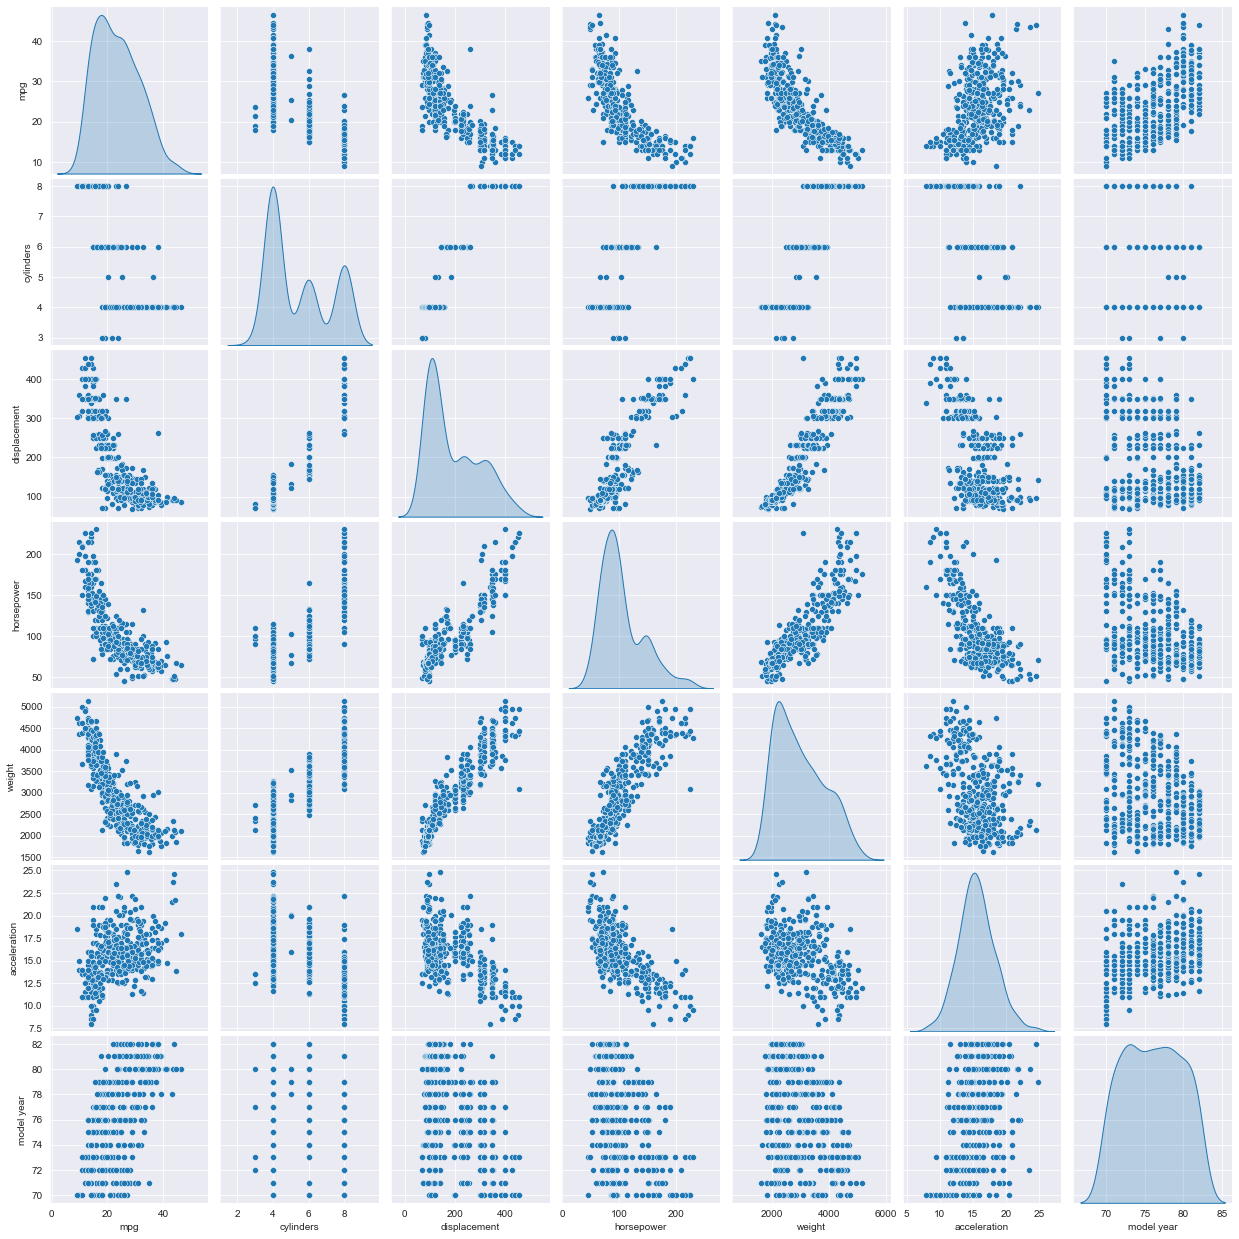

In [39]:
# All columns except the dummy variables created previously
df_attr = df.iloc[:, 0:7]

# Creating the pairplot
sns.pairplot(df_attr, diag_kind='kde') # plotting the density curve instead of the histogram in the diagonal
plt.show()

**As we can see, the relationship among the 'mpg' variable and other variables is not really linear, but we can get close with a simple Linear Regression model.**

In [40]:
df.groupby(['origin_america','origin_europe','origin_asia']).count()

mpg  cylinders  displacement  \
origin_america origin_europe origin_asia                                 
0              0             1             79         79            79   
               1             0             70         70            70   
1              0             0            249        249           249   

                                          horsepower  weight  acceleration  \
origin_america origin_europe origin_asia                                     
0              0             1                    79      79            79   
               1             0                    70      70            70   
1              0             0                   249     249           249   

                                          model year  
origin_america origin_europe origin_asia              
0              0             1                    79  
               1             0                    70  
1              0             0                   249

**There are 79 cars made in asia, 70 in europe and 249 in america**

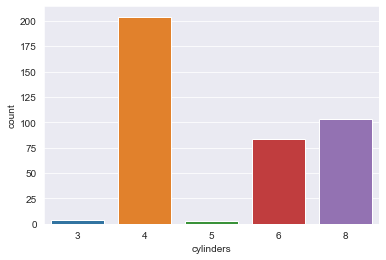

In [41]:
sns.countplot(x='cylinders', data=df)
plt.show()

**Majority of cars have 4 cylinders, folowed by 8 and 6 cylinders respectively. Cars with 3 or 5 cylinders are very rare**

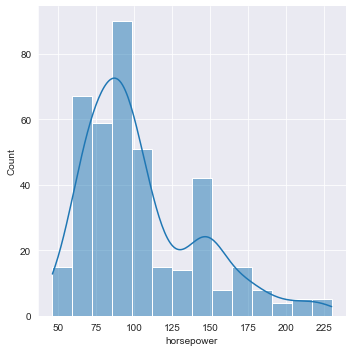

In [43]:
sns.displot(x='horsepower', kde=True, data=df)
plt.show()

**The horsepower variable is right-skewed**

### Spliting the data

In [45]:
X = df.drop(['mpg'], axis=1) # independent variables
y = df['mpg'] # dependent variables

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

- Not all the variables are statistically significant to predict the outcome variable. To check which are statistically significant or have predictive power to predict the target variable, we need to check the `p-value` against all the independent variables.
- **Interpreting the Regression Results:**

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    
2. **coeff**: It represents the change in the output Y due to a change of one unit in the variable (everything else held constant).
3. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the more accurate the coefficients are.
4. **P >|t|**: It is p-value.
   
   * Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis 

    Ho : Independent feature is not significant 
   
    Ha : Independent feature is significant 
    
   * A p-value of less than 0.05 is considered to be statistically significant.

   
5. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

* To be able to make statistical inferences from our model, **we will have to test the significance of the regression coefficients and linear regression assumptions.**

### Checking the performance of the model on the train and test data set

In [50]:
from sklearn import metrics

def model_performance(model, X_train, X_test, y_train, y_test):
    # prediction on training data
    y_pred_train = model.predict(X_train)
    
    # prediction on testing data
    yhat = model.predict(X_test)
    
    # printing results
    print(
    pd.DataFrame({
        "Data": ["Train", "Test"],
        "RMSE": [metrics.mean_squared_error(y_pred_train, y_train, squared=False),
                 metrics.mean_squared_error(yhat, y_test, squared=False)],
        
        "MAE": [metrics.mean_absolute_error(y_pred_train, y_train),
                metrics.mean_absolute_error(yhat, y_test)],
        
        "MAPE": [metrics.mean_absolute_percentage_error(y_pred_train, y_train),
                 metrics.mean_absolute_percentage_error(yhat, y_test)],
        
        "R2": [metrics.r2_score(y_pred_train, y_train),
               metrics.r2_score(yhat, y_test)]
    })
    )

In [51]:
from sklearn.linear_model import LinearRegression

# creating the model 
lrmodel1 = LinearRegression()
# training the model 
lrmodel1.fit(X_train, y_train)

# checking performance
model_performance(lrmodel1, X_train, X_test, y_train, y_test)

    Data      RMSE       MAE      MAPE        R2
0  Train  3.394323  2.653321  0.127507  0.771654
1   Test  3.026711  2.354281  0.108131  0.826786


### Creating other LinearRegression model, but this time using k-fold cross-validation

In [55]:
from sklearn.model_selection import cross_val_score

lrmodel2 = LinearRegression()

cv_score1 = cross_val_score(lrmodel2, X_train, y_train, cv=10)
cv_score2 = cross_val_score(lrmodel2, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

print('RSquared: %0.3f (+/- %0.3f)'%(cv_score1.mean(), cv_score1.std() * 2))
print('MSE: %0.3f (+/- %0.3f)'%(-1*cv_score2.mean(), cv_score2.std() * 2))

RSquared: 0.798 (+/- 0.065)
MSE: 12.386 (+/- 6.562)


### Building a Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor

rt = DecisionTreeRegressor() # creates the model
rt.fit(X_train, y_train) # training the model

DecisionTreeRegressor()

In [57]:
model_performance(rt, X_train, X_test, y_train, y_test)

    Data      RMSE       MAE      MAPE        R2
0  Train  0.000000  0.000000  0.000000  1.000000
1   Test  4.004581  2.598333  0.106714  0.750567


**Looking at the training and testing results, it's clear that the model is overfitted, because it has 0 error in training data and high error in testing data**

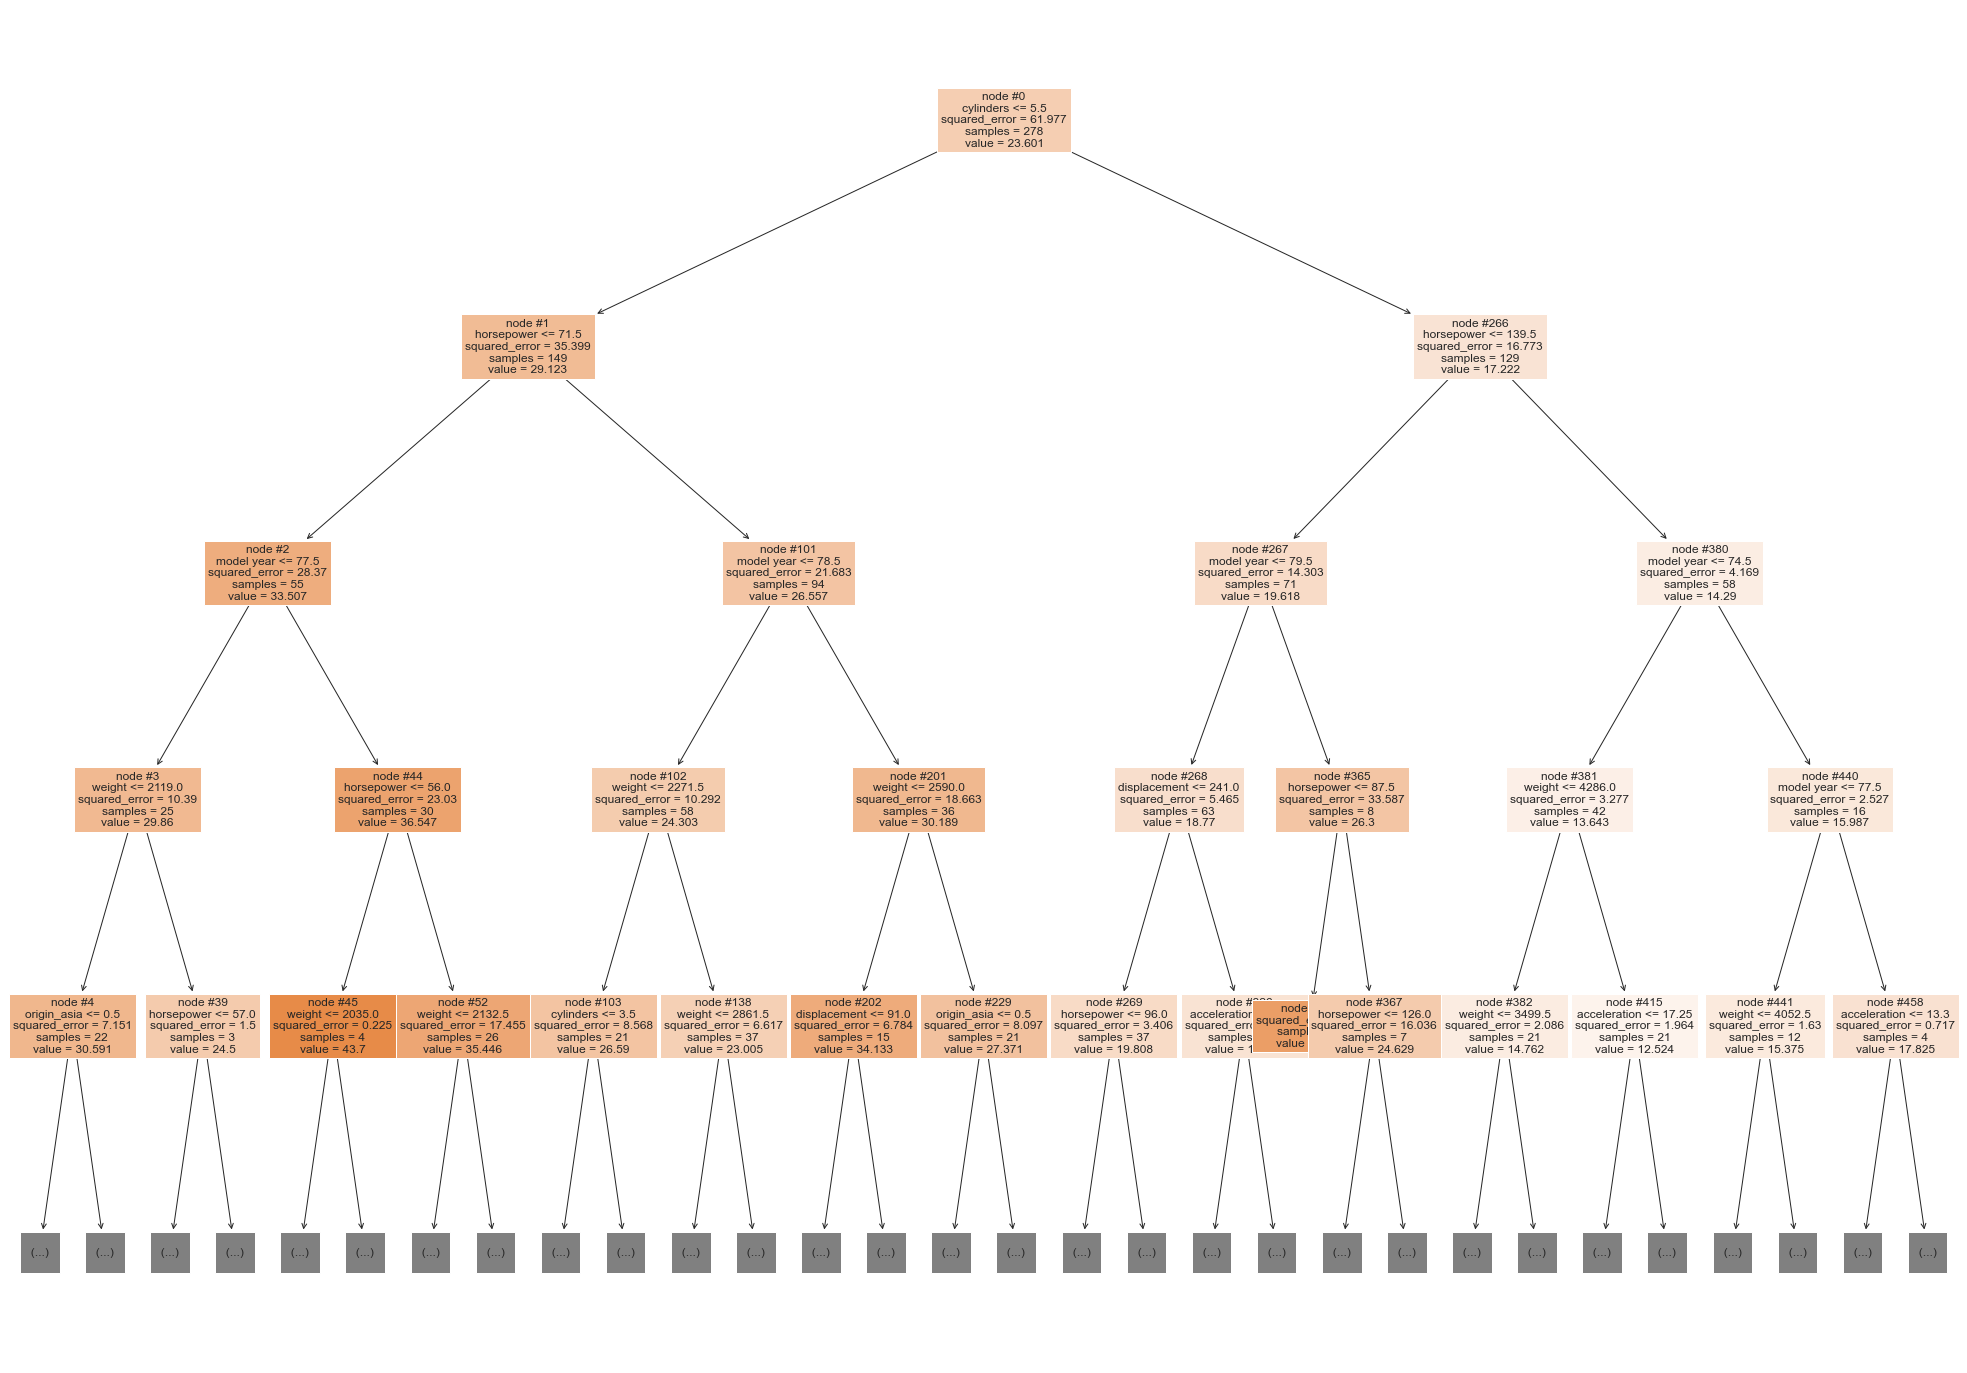

In [60]:
from sklearn.tree import plot_tree

features = list(X.columns)

plt.figure(figsize=(35,25))
plot_tree(rt, max_depth=4, feature_names=features, filled=True, fontsize=12, node_ids=True, class_names=True)
plt.show()

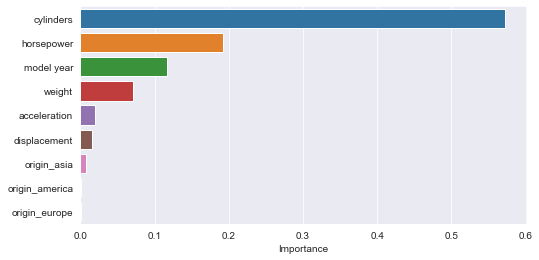

In [61]:
importances = rt.feature_importances_
columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(['Importance'], ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y=importance_df.index, data=importance_df)
plt.show()

### Building a Random Forest

#### Parameters for regression
**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**max_depth**
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor() # builds model
rf.fit(X_train, y_train) # trains model

RandomForestRegressor()

In [63]:
rf.score(X_test, y_test)

0.8724853517650217

In [64]:
model_performance(rf, X_train, X_test, y_train, y_test)

    Data      RMSE       MAE      MAPE        R2
0  Train  1.069926  0.746335  0.031162  0.979884
1   Test  2.730456  1.918250  0.078539  0.873241


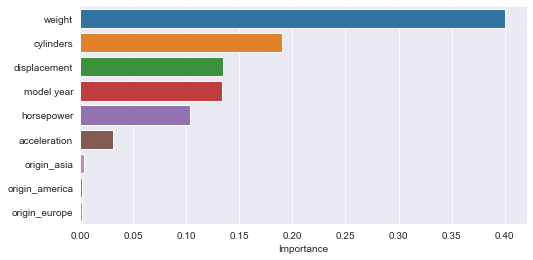

In [66]:
importances_rf = rf.feature_importances_

importances_rf_df = pd.DataFrame(importances_rf, index=columns, columns=['Importance']).sort_values(['Importance'], ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y=importances_rf_df.index, data=importances_rf_df)
plt.show()

### Comparing Models Performances

In [67]:
print('Linear Regression')
model_performance(lrmodel1, X_train, X_test, y_train, y_test)
print('Regression Tree')
model_performance(rt, X_train, X_test, y_train, y_test)
print('Random Forest')
model_performance(rf, X_train, X_test, y_train, y_test)

Linear Regression
    Data      RMSE       MAE      MAPE        R2
0  Train  3.394323  2.653321  0.127507  0.771654
1   Test  3.026711  2.354281  0.108131  0.826786
Regression Tree
    Data      RMSE       MAE      MAPE        R2
0  Train  0.000000  0.000000  0.000000  1.000000
1   Test  4.004581  2.598333  0.106714  0.750567
Random Forest
    Data      RMSE       MAE      MAPE        R2
0  Train  1.069926  0.746335  0.031162  0.979884
1   Test  2.730456  1.918250  0.078539  0.873241


**It's clear that the Random Forest model is the best**